In [1]:
from fenics import *

In [2]:
help(dolfin.common)

Help on package dolfin.common in dolfin:

NAME
    dolfin.common - The common module of dolfin

FILE
    /usr/local/lib/python2.7/dist-packages/dolfin/common/__init__.py

PACKAGE CONTENTS
    constants
    globalparameters
    math
    memory
    plotting
    time

CLASSES
    dolfin.common.time.Time
    
    class Time
     |  Methods defined here:
     |  
     |  __call__(self)
     |  
     |  __div__(self, value)
     |  
     |  __float__(self)
     |  
     |  __gt__(self, value)
     |  
     |  __iadd__(self, value)
     |  
     |  __idiv__(self, value)
     |  
     |  __imul__(self, value)
     |  
     |  __init__(self, value)
     |  
     |  __isub__(self, value)
     |  
     |  __lt__(self, value)
     |  
     |  __mul__(self, value)
     |  
     |  __str__(self)

FUNCTIONS
    memory_usage(as_string=True)
        Return memory usage of current process. Note that this function
        only works on Linux systems. If the flag as_string is true, memory
        usage is

In [3]:
import os

In [4]:
os.system('dolfin-convert')

512

In [5]:
import subprocess
direct_output = subprocess.check_output('dolfin-convert -h', shell=True)

In [6]:
print direct_output

Usage: dolfin-convert [OPTIONS] ... input.x output.y

Options:

  -h         display this help text and exit
  -i format  specify input format
  -o format  specify output format

Alternatively, the following long options may be used:

  --help     same as -h
  --input    same as -i
  --output   same as -o

Supported formats:

  xml      - DOLFIN XML mesh format (current)
  xml-old  - DOLFIN XML mesh format (DOLFIN 0.6.2 and earlier)
  mesh     - Medit, generated by tetgen with option -g
  Triangle - Triangle file format (input prefix of .ele and .node files)
  gmsh     - Gmsh, version 2.0 file format
  metis    - Metis graph file format
  scotch   - Scotch graph file format
  diffpack - Diffpack tetrahedral grid format
  abaqus   - Abaqus tetrahedral grid format
  ExodusII - Sandia Format (requires ncdump utility from NetCDF)
  Star-CD  - Star-CD tetrahedral grid format

If --input or --output are not specified, the format will
be deduced from the suffix:

  .xml  - xml
  .mesh - mesh


In [7]:
print subprocess.check_output('dolfin-convert ./shared/untitled.msh test.xml', shell=True)

Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 113 vertices
Found all vertices
Expecting 192 cells
Found all cells
Conversion done



In [8]:
from fenics import *

In [24]:
%matplotlib inline

<IPython.core.display.Javascript object>


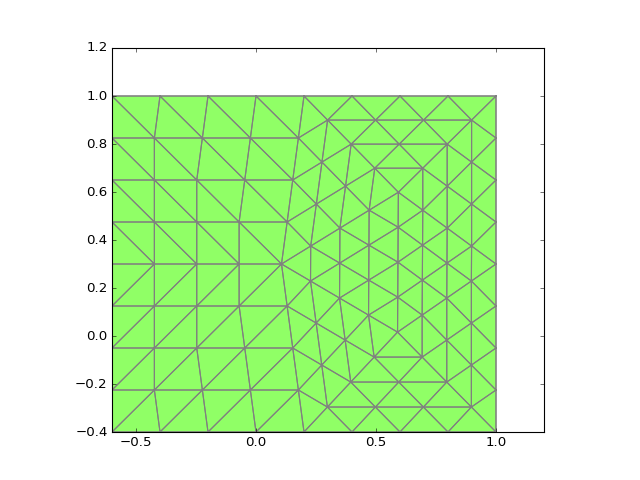

In [10]:
plot(Mesh('test.xml'))

In [11]:
#plot(Mesh('test_physical_region.xml'))

In [12]:
mesh = Mesh('test.xml')
subdomains = MeshFunction("size_t", mesh, "test_physical_region.xml")
boundaries = MeshFunction("size_t", mesh, "test_facet_region.xml")

In [13]:
plot(subdomains)

I see. So facets holds boundaries. and phyiscal region holds the face values.
The values are 1 and 2 for edges

In [14]:
plot(boundaries)

In [15]:
boundaries

<dolfin.cpp.mesh.MeshFunctionSizet; proxy of <Swig Object of type 'std::shared_ptr< dolfin::MeshFunction< std::size_t > > *' at 0x7ff4c8974030> >

In [16]:
help(boundaries)

Help on MeshFunctionSizet in module dolfin.cpp.mesh object:

class MeshFunctionSizet(dolfin.cpp.common.Variable, HierarchicalMeshFunctionSizet)
 |  A MeshFunction is a function that can be evaluated at a set of
 |  mesh entities. A MeshFunction is discrete and is only defined at
 |  the set of mesh entities of a fixed topological dimension.  A
 |  MeshFunction may for example be used to store a global numbering
 |  scheme for the entities of a (parallel) mesh, marking sub
 |  domains or boolean markers for mesh refinement.
 |  
 |  Method resolution order:
 |      MeshFunctionSizet
 |      dolfin.cpp.common.Variable
 |      HierarchicalMeshFunctionSizet
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, index)
 |  
 |  __init__(self, *args)
 |      **Overloaded versions**
 |      
 |      * MeshFunction\ ()
 |      
 |        Create empty mesh function
 |      
 |      * MeshFunction\ (mesh)
 |      
 |        Create empty mesh function on given mesh
 

In [30]:
V = FunctionSpace(mesh, 'P', 1)
u_D = Expression('0', degree=2)
u_D2 = Expression('1 + 3*x[0]*x[0] + 2*x[1]*x[1]', degree=2)
bcs = [DirichletBC(V, u_D, boundaries, 1),# of course with your boundary
       DirichletBC(V, u_D2, boundaries, 0)]

--- Instant: compiling ---
--- Instant: compiling ---


In [31]:
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx
u = Function(V)
solve(a == L, u, bcs=bcs)

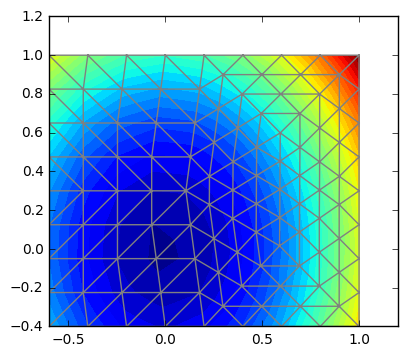

In [32]:
plot(u)
plot(mesh)

In [20]:
boundaries

<dolfin.cpp.mesh.MeshFunctionSizet; proxy of <Swig Object of type 'std::shared_ptr< dolfin::MeshFunction< std::size_t > > *' at 0x7ff4c8974030> >

In [21]:
help(boundaries.mesh())

Help on Mesh in module dolfin.cpp.mesh object:

class Mesh(dolfin.cpp.common.Variable, HierarchicalMesh)
 |  A :py:class:`Mesh` consists of a set of connected and numbered mesh entities.
 |  
 |  Both the representation and the interface are
 |  dimension-independent, but a concrete interface is also provided
 |  for standard named mesh entities:
 |  
 |  .. tabularcolumns:: |c|c|c|
 |  
 |  +--------+-----------+-------------+
 |  | Entity | Dimension | Codimension |
 |  +========+===========+=============+
 |  | Vertex |  0        |             |
 |  +--------+-----------+-------------+
 |  | Edge   |  1        |             |
 |  +--------+-----------+-------------+
 |  | Face   |  2        |             |
 |  +--------+-----------+-------------+
 |  | Facet  |           |      1      |
 |  +--------+-----------+-------------+
 |  | Cell   |           |      0      |
 |  +--------+-----------+-------------+
 |  
 |  When working with mesh iterators, all entities and connectivity
 | 

In [22]:
boundaries.mesh()